In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')

## Data Cleaning 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
## Checking if there is a duplicate value in our data

In [21]:
df["customerID"].duplicated().sum()

0

In [23]:
df.duplicated().sum()

0

#converting 0 and 1 values of senior citizen to Yes/No to make it easier to understand

In [26]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [28]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes')

In [30]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Analyzing The Data

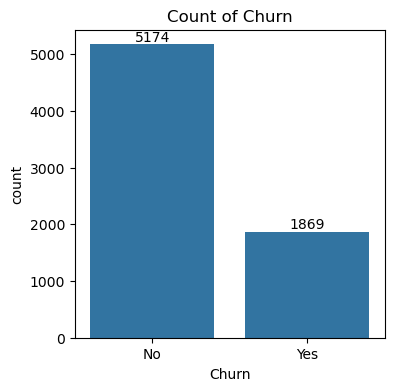

In [87]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Churn', data = df);
# for showing count in the plot 
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

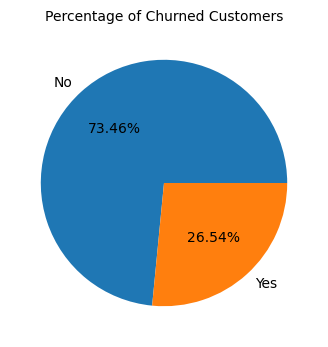

In [97]:
## showing count in percentage
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%' )
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customer have churned out. now lets explore the reason behind it

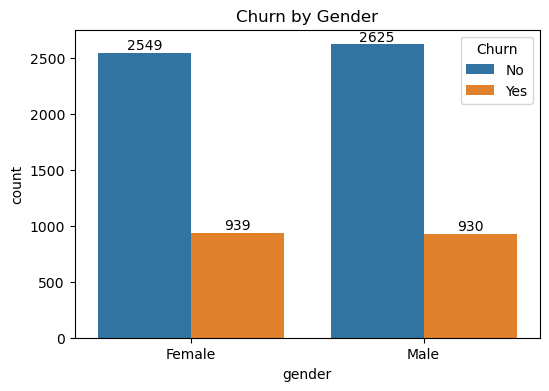

In [140]:
plt.figure(figsize = (6,4))
ax1 = sns.countplot(x = 'gender', data = df, hue = 'Churn');
plt.title('Churn by Gender')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.show()

In [142]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


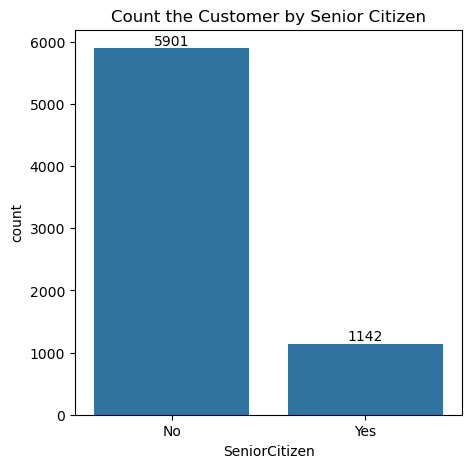

In [188]:
plt.figure(figsize = (5,5))
ax1 = sns.countplot(x = 'SeniorCitizen', data = df);
ax1.bar_label(ax1.containers[0])
plt.title('Count the Customer by Senior Citizen')
plt.show()

<Figure size 500x500 with 0 Axes>

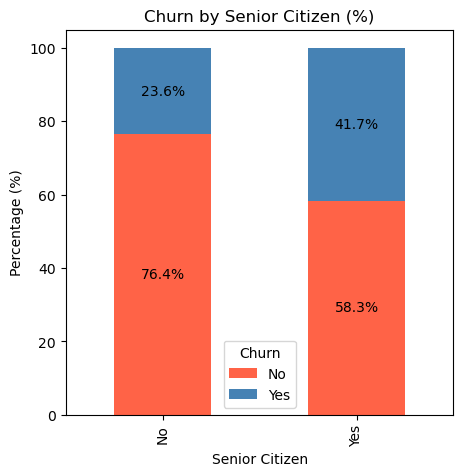

In [168]:
# Calculate percentage of each 'Churn' group within each 'SeniorCitizen' category
df_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
df_percentages = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Convert counts to percentage

# Create a stacked bar plot
plt.figure(figsize=(5,5))
ax1 = df_percentages.plot(kind='bar', stacked=True, figsize=(5, 5), color=['#FF6347', '#4682B4']);

# Add percentage labels to each bar segment
for p in ax1.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax1.text(x, y, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Senior Citizen')
plt.show()

#Comparitively a greater percentage of people in  senior citizen category have churned

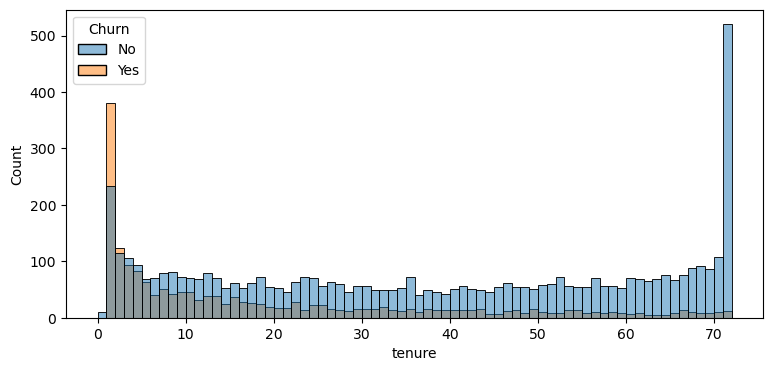

In [197]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

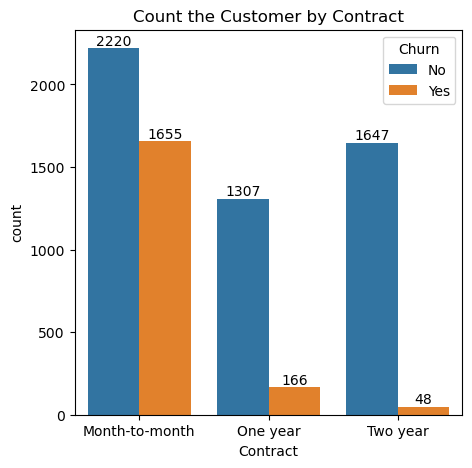

In [206]:
plt.figure(figsize = (5,5))
ax1 = sns.countplot(x = 'Contract', data = df, hue = 'Churn');
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title('Count the Customer by Contract')
plt.show()

#people who have month to month cotract are likely to churn then from those who have 1 or 2 years of contract

In [209]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

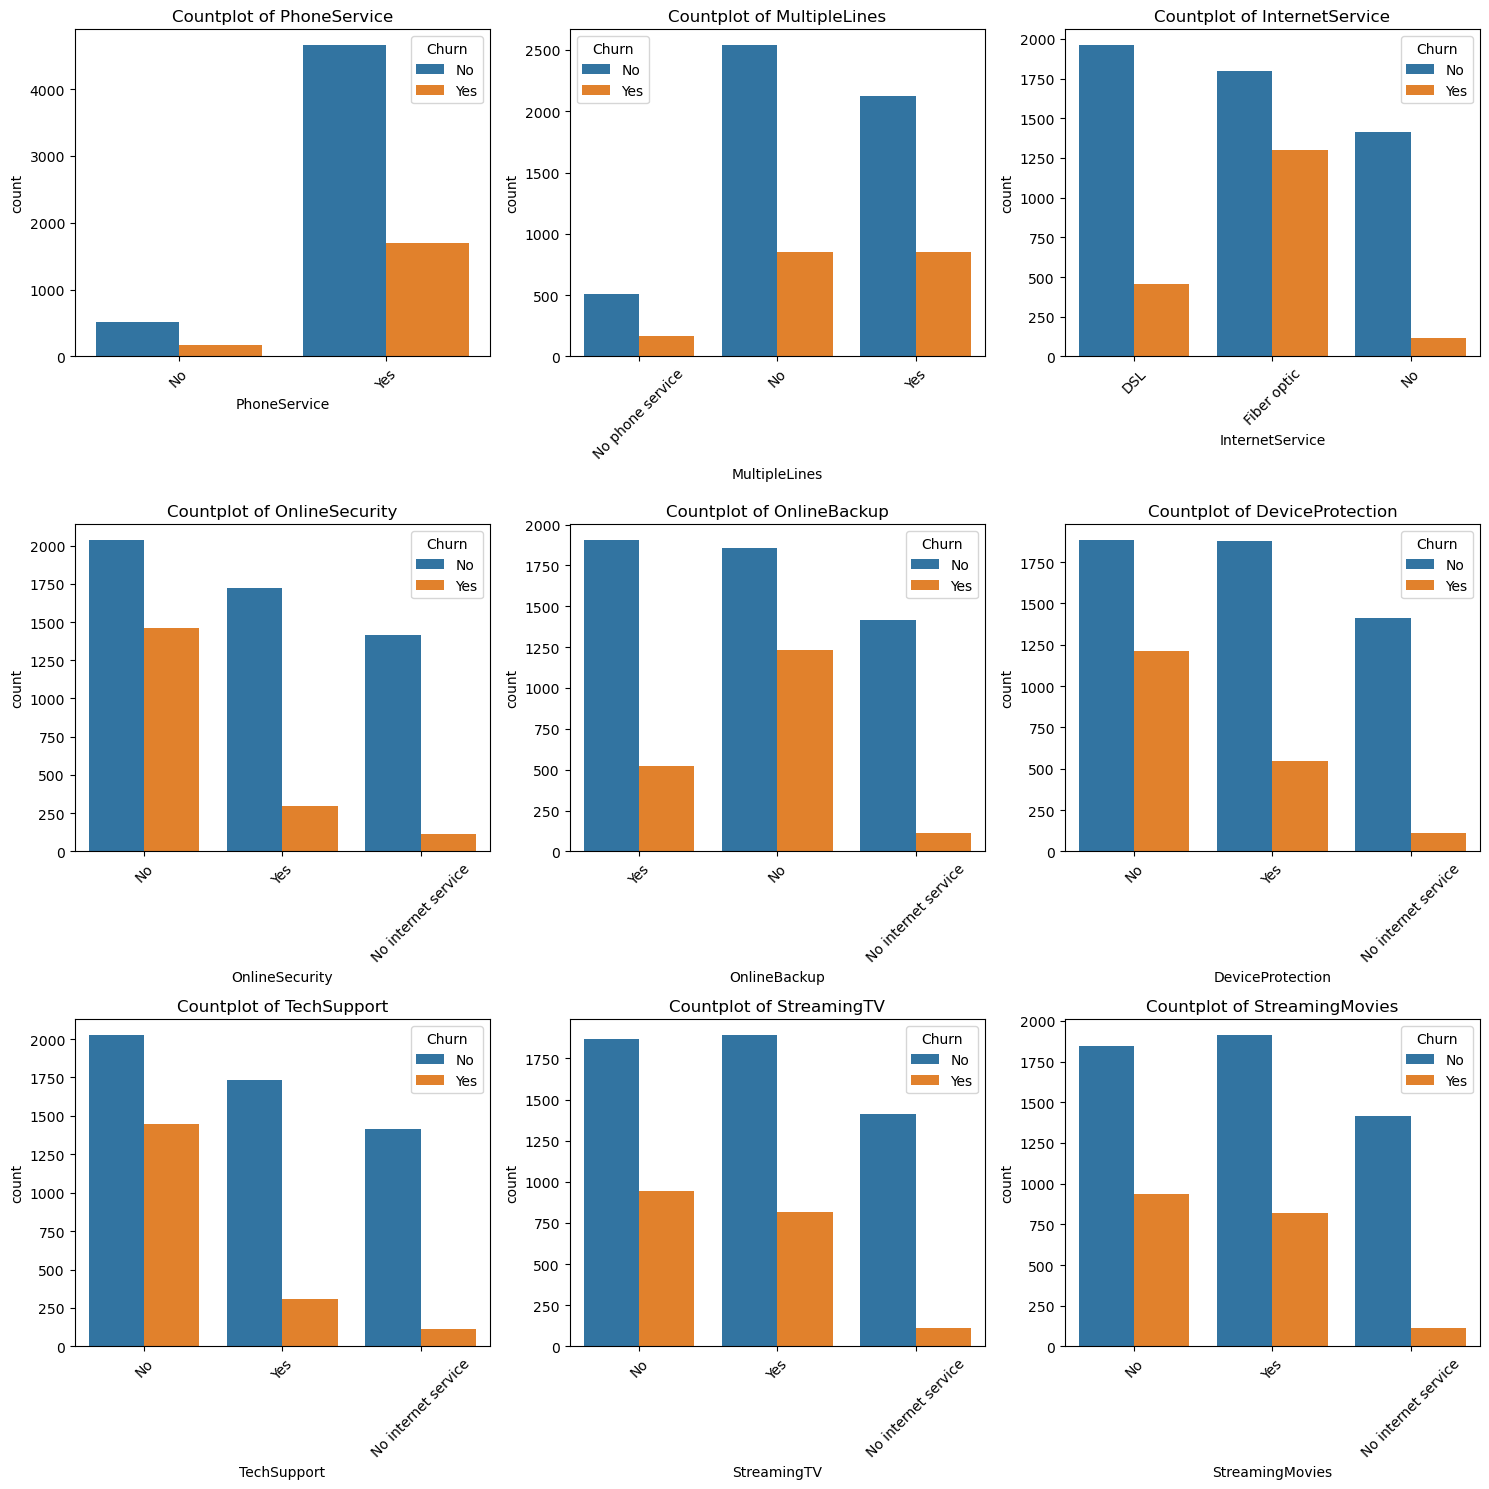

In [245]:
# Assuming 'df' is your DataFrame containing the columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of rows and columns for subplots
n_rows = 3  # Adjust based on how many rows you want
n_cols = 3  # Adjust based on how many columns you want

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot a countplot
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f'Countplot of {column}')
    
    # Rotate x-tick labels without using set_xticklabels
    plt.sca(axes[i])  # Set the current axes to the subplot
    plt.xticks(rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


Categories such as Phone Service, Internet Service, and various add-ons (e.g., Online Security, Device Protection, Streaming) are analyzed. Customers who do not use or have certain services (e.g., Online Security) seem more likely to churn, indicated by a higher proportion of churn in those segments.

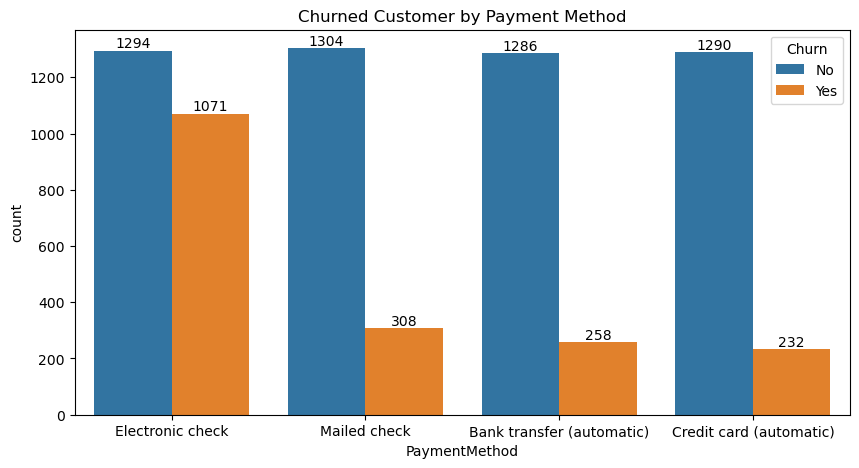

In [256]:
plt.figure(figsize = (10,5))
ax1 = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn');
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title('Churned Customer by Payment Method')
plt.show()

#customer is likely to churn when he is using electronic check as a payment method